Manim Community v0.18.1

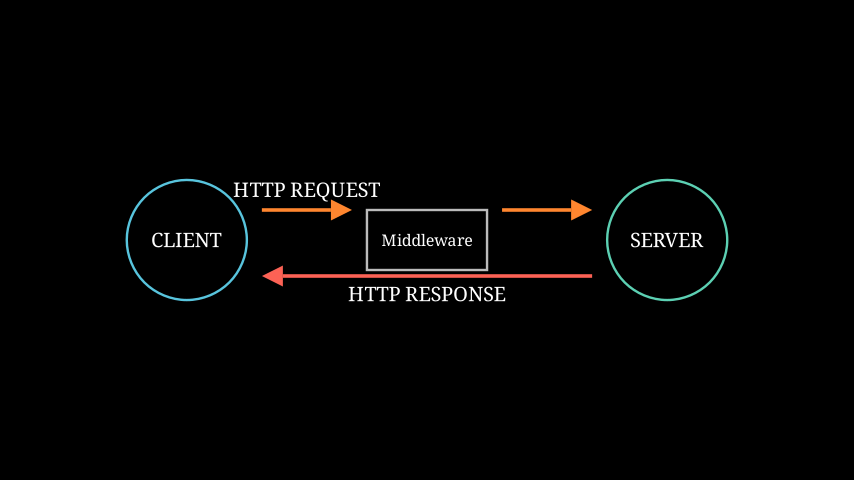

In [1]:
from manim import *

class ClientServerDiagram(Scene):
    def construct(self):
        # Create shapes
        client = Circle(radius=1, color=BLUE).shift(LEFT * 4)
        client_label = Text("CLIENT").scale(0.5).move_to(client)

        server = Circle(radius=1, color=TEAL).shift(RIGHT * 4)
        server_label = Text("SERVER").scale(0.5).move_to(server)

        middleware = Rectangle(width=2, height=1, color=LIGHT_GRAY)#.shift(UP*0.2)
        middleware_label = Text("Middleware").scale(0.4).move_to(middleware)

        # Add shapes to scene
        self.add(client, client_label, server, server_label, middleware, middleware_label)

        # Animate HTTP request
        request_arrow, request_label = self.add_horizontal_arrow(client, middleware, "HTTP REQUEST", shift_up=0.5, color=ORANGE)
        self.play(Create(request_arrow), Write(request_label))

        middleware_to_server_arrow, _ = self.add_horizontal_arrow(middleware, server, "", shift_up=0.5, color=ORANGE)
        self.play(Create(middleware_to_server_arrow))

        # Animate HTTP response
        response_arrow, response_label = self.add_horizontal_arrow(server, client, "HTTP RESPONSE", shift_up=-0.6, color=RED, text_buff=-0.3)
        self.play(Create(response_arrow), Write(response_label))

    def add_horizontal_arrow(self, mobject1, mobject2, label_text, shift_up=0.0, text_buff=0.3, **kwargs):
        # Get the edge centers of the mobjects
        if mobject1.get_center()[0] < mobject2.get_center()[0]:
            start = mobject1.get_edge_center(RIGHT)
            end = mobject2.get_edge_center(LEFT)
        else:
            start = mobject1.get_edge_center(LEFT)
            end = mobject2.get_edge_center(RIGHT)
        
        # Shift the arrow up or down
        start[1] += shift_up
        end[1] += shift_up
        
        # Create the arrow
        arrow = Arrow(start=start, end=end, **kwargs)
        
        # Create the label
        label = Text(label_text).scale(0.5)
        if text_buff >= 0:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        else:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        return arrow, label
%manim -ql -v CRITICAL --save_last_frame ClientServerDiagram

In [26]:
from manim import *

class ClientServerDiagram(Scene):
    def construct(self):
        # Define the shift distances
        client_shift_distance = LEFT * 2
        server_shift_distance = RIGHT * 2
        middleware_to_client_shift_distance = LEFT * 2
        figure_shift = UP * 0.5
        
        # Title and definition
        title = Text("Understanding Middleware in Express.js", font_size=40).to_edge(UP)
        self.play(Write(title))
        middleware_def = Paragraph(
            "Middleware: Functions that have access to",
            "the request and response objects",
            font_size=30,
            color=YELLOW_B,
            alignment="center",
        ).next_to(title, DOWN)
        self.play(Write(middleware_def))
        
        # Create shapes
        client = Circle(radius=1, color=BLUE).shift(LEFT * 4).shift(figure_shift)
        client_label = Text("CLIENT").scale(0.5).move_to(client)

        server = Circle(radius=1, color=TEAL).shift(RIGHT * 4).shift(figure_shift)
        server_label = Text("SERVER").scale(0.5).move_to(server)

        middleware = Rectangle(width=2, height=1, color=LIGHT_GRAY).shift(figure_shift)
        middleware_label = Text("Middleware").scale(0.4).move_to(middleware)

        # Animate shapes
        self.play(Create(client), Write(client_label))
        self.play(Create(server), Write(server_label))
        self.play(Create(middleware), Write(middleware_label))

        # Animate HTTP request
        request_arrow, request_label = self.add_horizontal_arrow(client, middleware, "HTTP REQUEST", shift_up=0.5, color=ORANGE, text_buff=0.35)
        self.play(Create(request_arrow), Write(request_label))

        middleware_to_server_arrow, _ = self.add_horizontal_arrow(middleware, server, "", shift_up=0.5, color=ORANGE)
        self.play(Create(middleware_to_server_arrow))

        # Animate HTTP response
        response_arrow, response_label = self.add_horizontal_arrow(server, middleware, "HTTP RESPONSE", shift_up=-0.6, color=RED, text_buff=-0.35)
        self.play(Create(response_arrow), Write(response_label))

        # Animate HTTP response back to client
        middleware_to_client_arrow, _ = self.add_horizontal_arrow(middleware, client, "", shift_up=-0.6, color=RED, text_buff=-0.3)
        self.play(Create(middleware_to_client_arrow))

        # Move client-related elements
        self.play(
            client.animate.shift(client_shift_distance),
            client_label.animate.shift(client_shift_distance),
            request_arrow.animate.shift(client_shift_distance),
            request_label.animate.shift(client_shift_distance),
            response_arrow.animate.shift(server_shift_distance),
            response_label.animate.shift(server_shift_distance),
            server.animate.shift(server_shift_distance),
            server_label.animate.shift(server_shift_distance),
            middleware_to_server_arrow.animate.shift(server_shift_distance),
            middleware_to_client_arrow.animate.shift(middleware_to_client_shift_distance),
            middleware.animate.scale(0.5*RIGHT+UP),
            middleware_label.animate.scale(0.5),
        )

        middleware2 = Rectangle(width=1, height=1, color=LIGHT_GRAY).shift(LEFT * 2.5).shift(figure_shift)
        middleware_label2 = Text("Middleware").scale(0.2).move_to(middleware2)

        middleware3 = Rectangle(width=1, height=1, color=LIGHT_GRAY).shift(RIGHT * 2.5).shift(figure_shift)
        middleware_label3 = Text("Middleware").scale(0.2).move_to(middleware3)

        self.play(Create(middleware2), Write(middleware_label2), Create(middleware3), Write(middleware_label3))

        # Add new bidirectional arrows between middleware rectangles
        middleware_to_middleware2_arrow = self.add_bidirectional_arrow(middleware, middleware2, color=YELLOW).scale(0.0001)
        middleware_to_middleware3_arrow = self.add_bidirectional_arrow(middleware, middleware3, color=YELLOW).scale(0.0001)

        self.add(middleware_to_middleware2_arrow, middleware_to_middleware3_arrow)
        self.play(middleware_to_middleware2_arrow.animate.scale(1/0.0001), middleware_to_middleware3_arrow.animate.scale(1/0.0001), run_time=0.5)

        self.wait(1)

        advantages_text = VGroup(
            Text("Advantages of Middleware:", color=YELLOW),
            Tex("• Modular and reusable code"),
            Tex("• Simplified request/response handling"),
            Tex("• Enhanced security and performance"),
            Tex("• Easier maintenance and scalability")
        ).arrange(DOWN, aligned_edge=LEFT).scale(0.6).next_to(middleware, DOWN, buff=1)

        self.play(Write(advantages_text))
        self.wait(2)

        # Fade out the advantages text
        self.play(FadeOut(advantages_text))


        # Fade out middleware2, middleware3, and yellow arrows
        self.play(
            FadeOut(middleware2),
            FadeOut(middleware3),
            FadeOut(middleware_label2),
            FadeOut(middleware_label3),
            FadeOut(middleware_to_middleware2_arrow),
            FadeOut(middleware_to_middleware3_arrow),
            FadeOut(middleware_to_client_arrow)  # Red arrow ending at the client
        )

        # New animations: Shift client and server elements
        self.play(
            client.animate.shift(-client_shift_distance),
            client_label.animate.shift(-client_shift_distance),
            request_arrow.animate.shift(-client_shift_distance),
            request_label.animate.shift(-client_shift_distance),
            response_arrow.animate.shift(-server_shift_distance),
            response_label.animate.shift(-server_shift_distance),
            server.animate.shift(-server_shift_distance),
            server_label.animate.shift(-server_shift_distance),
            middleware_to_server_arrow.animate.shift(-server_shift_distance),
            middleware.animate.scale(2*RIGHT+UP),
            middleware_label.animate.scale(2),
        )

        # Update and animate the response arrow
        updated_response_arrow , updated_response_label= self.add_horizontal_arrow(server, client, "HTTP RESPONSE", shift_up=-0.6, color=RED, text_buff=-0.35)
        
        # Shift the label to the middle of the arrow
        self.play(
            Transform(response_arrow, updated_response_arrow),
            Transform(response_label, updated_response_label)
        )


        code = '''const express = require("express");
const app = express();

app.use(express.json());  // Middleware to parse JSON bodies
        '''
        code_text = Code(code=code.strip(), tab_width=4, background="window",
                             language="javascript", font="Monospace",
                             line_spacing=0.5, style="monokai"
                             ).next_to(middleware, DOWN).shift(DOWN*0.75)
        
        self.play(Write(code_text))
        self.wait(3)

    def add_horizontal_arrow(self, mobject1, mobject2, label_text, shift_up=0.0, text_buff=0.3, **kwargs):
        # Get the edge centers of the mobjects
        if mobject1.get_center()[0] < mobject2.get_center()[0]:
            start = mobject1.get_edge_center(RIGHT)
            end = mobject2.get_edge_center(LEFT)
        else:
            start = mobject1.get_edge_center(LEFT)
            end = mobject2.get_edge_center(RIGHT)
        
        # Shift the arrow up or down
        start[1] += shift_up
        end[1] += shift_up
        
        # Create the arrow
        arrow = Arrow(start=start, end=end, **kwargs)
        
        # Create the label
        label = Text(label_text).scale(0.5)
        if text_buff >= 0:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        else:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        return arrow, label

    def add_bidirectional_arrow(self, mobject1, mobject2, **kwargs):
        # Get the edge centers of the mobjects
        if mobject1.get_center()[0] < mobject2.get_center()[0]:
            start = mobject1.get_edge_center(RIGHT)
            end = mobject2.get_edge_center(LEFT) 
        else:
            start = mobject1.get_edge_center(LEFT)
            end = mobject2.get_edge_center(RIGHT)
        
        # Create the bidirectional arrow
        return DoubleArrow(start=start, end=end, **kwargs)



%manim -qh  -v CRITICAL ClientServerDiagram

Manim Community v0.18.1

Manim Community v0.18.1

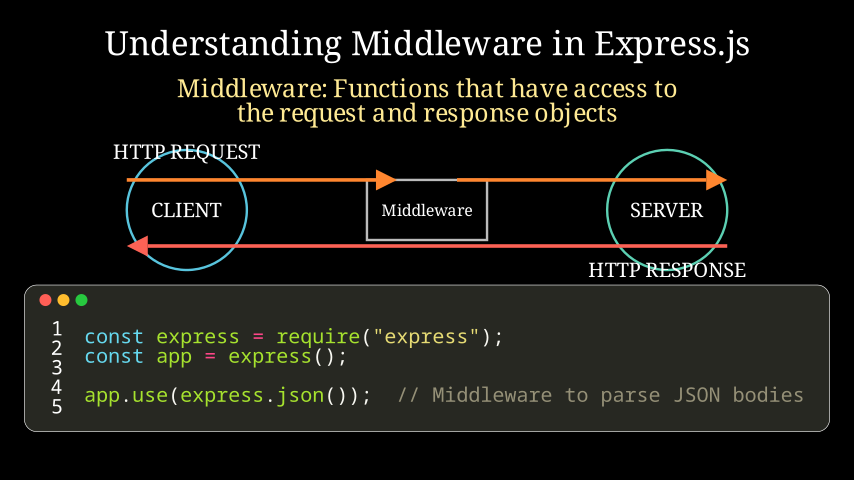